In [15]:
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import bt
from bt.core import Algo
from pypfopt.expected_returns import mean_historical_return
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.risk_models import risk_matrix
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
import numpy as np
from math import sqrt
from datetime import datetime
from pandas_datareader import data as wb
import datetime as dt

In [29]:
main_tickers = ['FNTN.DE', 'NLM.F', 'MMK.VI', 'WIE.VI', 'FHZN.SW', 'KP5.F', 'LXS.DE', 'TGYM.MI', 'NDX1.DE', '39K.F', 'MOR.DE', 'TMV.DE'] #Data is imported from yahoo finance in the currency stated there
today = dt.date.today()
start_date_input = today - dt.timedelta(days=365*5) #importing data five years back 

In [30]:
def import_stock_data(tickers, start, end = datetime.today().strftime('%Y-%m-%d')):
    data = pd.DataFrame()
    if len([tickers]) ==1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

data = import_stock_data(tickers = main_tickers, start = start_date_input)

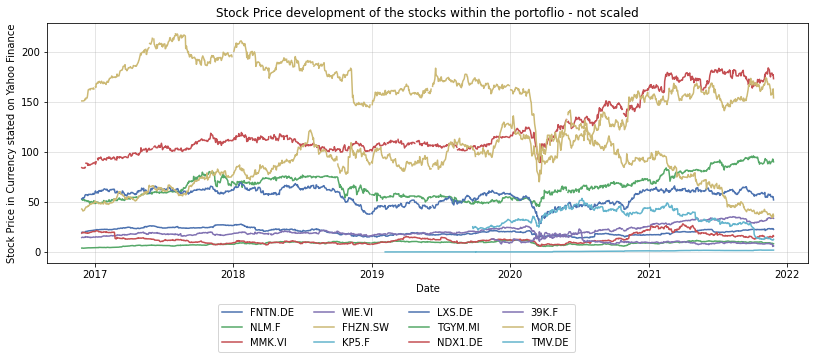

In [47]:
columns = data.columns
fig, ax = plt.subplots(figsize=(30,15))
plt.subplot(3,2,1)
for col in columns:
    plt.plot(data[col])
    plt.xlabel('Date')
    plt.ylabel('Stock Price in Currency stated on Yahoo Finance')
    plt.title('Stock Price development of the stocks within the portoflio - not scaled')
    plt.grid(alpha = 0.4)
    plt.legend(columns, ncol=4, fancybox=True, bbox_to_anchor=(0.70, -0.15))

